<center><h1>Haidar_Anastasia_HW8</h1></center>

Name: Anastasia Haidar
<br>
Github Username: haidarnastya
<br>
USC ID: 1163-9833-46

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, adjusted_rand_score, normalized_mutual_info_score
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [15]:
#column names from .names file
col_names = ['id', 'diagnosis']

#feature names
features = ['radius', 'texture', 'perimeter', 'area', 'smoothness',
            'compactness', 'concavity', 'concave points', 'symmetry', 'fractal dimension']

#create col names for mean, se, and worst features
for stat in ['mean', 'se', 'worst']:
    for feature in features:
        col_names.append(f'{feature}_{stat}')

#read the .data file
wbdc_data = pd.read_csv('./data/wdbc.data', header=None, names=col_names)

print(wbdc_data.shape)
print(wbdc_data.head())

(569, 32)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst

In [16]:
#create training and test sets, randomly stratified(using both 20% of positive and negative classes)
#separate features and labels
x = wbdc_data.drop(['id', 'diagnosis'], axis=1)
y = wbdc_data['diagnosis'].map({'M': 1, 'B': 0})

#split into 80% train, 20% test from both classes
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

print('Training set:')
print('Positive samples:', sum(y_train==1))
print('Negative samples:', sum(y_train==0))

print('Test set:')
print('Positive samples:', sum(y_test==1))
print('Negative samples:', sum(y_test==0))

#Normalize the data before building the models
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Training set:
Positive samples: 170
Negative samples: 285
Test set:
Positive samples: 42
Negative samples: 72


### (b) Monte-Carlo Simulation

#### (i) Supervised Learning

Starting Monte Carlo Simulation with M=30 runs
Run 1/30
Best C parameter: 0.1
Run 2/30
Best C parameter: 1
Run 3/30
Best C parameter: 0.1
Run 4/30
Best C parameter: 0.1
Run 5/30
Best C parameter: 0.1
Run 6/30
Best C parameter: 0.1
Run 7/30
Best C parameter: 1
Run 8/30
Best C parameter: 0.1
Run 9/30
Best C parameter: 0.1
Run 10/30
Best C parameter: 0.1
Run 11/30
Best C parameter: 0.1
Run 12/30
Best C parameter: 0.1
Run 13/30
Best C parameter: 0.1
Run 14/30
Best C parameter: 0.1
Run 15/30
Best C parameter: 10
Run 16/30
Best C parameter: 0.1
Run 17/30
Best C parameter: 1
Run 18/30
Best C parameter: 1
Run 19/30
Best C parameter: 0.1
Run 20/30
Best C parameter: 1
Run 21/30
Best C parameter: 0.1
Run 22/30
Best C parameter: 0.1
Run 23/30
Best C parameter: 0.1
Run 24/30
Best C parameter: 1
Run 25/30
Best C parameter: 0.1
Run 26/30
Best C parameter: 0.1
Run 27/30
Best C parameter: 10
Run 28/30
Best C parameter: 0.1
Run 29/30
Best C parameter: 0.1
Run 30/30
Best C parameter: 0.1
SUMMARY OF RESUL

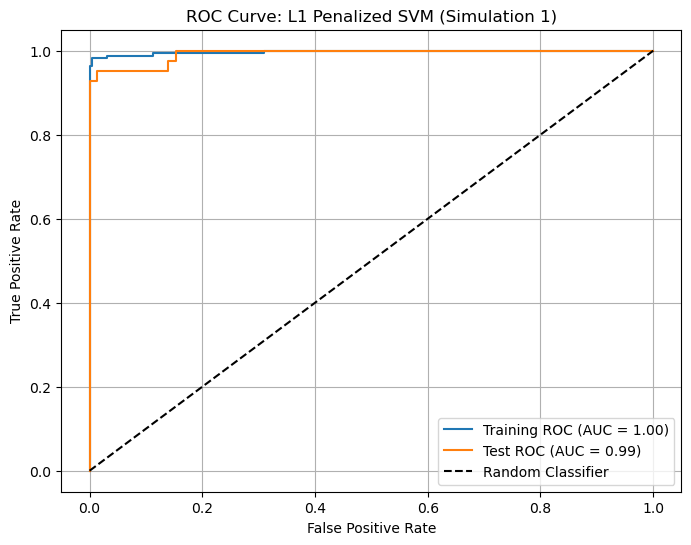

Training Confusion Matrix:
 [[284   1]
 [  3 167]]
Test Confusion Matrix:
 [[69  3]
 [ 2 40]]


In [ ]:
#M=30 runs of monte carlo simulation with l1 penalization
M=30

#store metric results
train_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}
test_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}

#store one simulations results for plotting
save_first_sim = {}

print('Starting Monte Carlo Simulation with M=30 runs')

for run_idx in range(M):
    print(f'Run {run_idx+1}/{M}')

    #create a different train/test split for each of the M=30 runs
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=run_idx)

    #normalize data for each split
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    #define L1 penalized SVM
    params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    l1_svm = LinearSVC(penalty='l1', dual=False, max_iter = 10000, random_state=42)

    #5 fold CV to choose penalty parameter C
    grid_search = GridSearchCV(l1_svm, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(x_train_scaled, y_train)

    best_svm = grid_search.best_estimator_
    print(f'Best C parameter: {grid_search.best_params_["C"]}')

    #predictions
    y_train_pred_l1 = best_svm.predict(x_train_scaled)
    y_test_pred_l1 = best_svm.predict(x_test_scaled)
    y_train_scores_l1 = best_svm.decision_function(x_train_scaled)
    y_test_scores_l1 = best_svm.decision_function(x_test_scaled)

    #calculate metrics for training set
    train_metrics['accuracy'].append(accuracy_score(y_train, y_train_pred_l1))
    train_metrics['precision'].append(precision_score(y_train, y_train_pred_l1))
    train_metrics['recall'].append(recall_score(y_train, y_train_pred_l1))
    train_metrics['f1'].append(f1_score(y_train, y_train_pred_l1))
    train_metrics['roc_auc'].append(roc_auc_score(y_train, y_train_scores_l1))

    #calculate metrics for test set
    test_metrics['accuracy'].append(accuracy_score(y_test, y_test_pred_l1))
    test_metrics['precision'].append(precision_score(y_test, y_test_pred_l1))
    test_metrics['recall'].append(recall_score(y_test, y_test_pred_l1))
    test_metrics['f1'].append(f1_score(y_test, y_test_pred_l1))
    test_metrics['roc_auc'].append(roc_auc_score(y_test, y_test_scores_l1))

    #save first run results for ROC plot
    if run_idx == 0:
        save_first_sim = {'y_train': y_train, 'y_train_pred': y_train_pred_l1,'y_train_scores': y_train_scores_l1,
                          'y_test': y_test, 'y_test_pred':y_test_pred_l1, 'y_test_scores': y_test_scores_l1}
        
#average metrics over M=30 runs
print('SUMMARY OF RESULTS')
print('Average Training Metrics:')
for metric in train_metrics:
    avg_value = np.mean(train_metrics[metric])
    std_value = np.std(train_metrics[metric])
    print(f'{metric}: {avg_value:.4f} ± {std_value:.4f}')

print('Average Test Metrics:')
for metric in test_metrics:
    avg_value = np.mean(test_metrics[metric])
    std_value = np.std(test_metrics[metric])
    print(f'{metric}: {avg_value:.4f} ± {std_value:.4f}')

#ROC/AUC visualization
plt.figure(figsize=(8,6))
fpr_train, tpr_train, _ = roc_curve(save_first_sim['y_train'], save_first_sim['y_train_scores'])
fpr_test, tpr_test, _ = roc_curve(save_first_sim['y_test'], save_first_sim['y_test_scores'])
train_auc = roc_auc_score(save_first_sim['y_train'], save_first_sim['y_train_scores'])
test_auc = roc_auc_score(save_first_sim['y_test'], save_first_sim['y_test_scores'])

plt.plot(fpr_train, tpr_train, label=f'Training ROC (AUC = {train_auc:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {test_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: L1 Penalized SVM (Simulation 1)')
plt.legend()
plt.grid()
plt.show()

#Confusion Matrices
cm_train = confusion_matrix(save_first_sim['y_train'], save_first_sim['y_train_pred'])
cm_test = confusion_matrix(save_first_sim['y_test'], save_first_sim['y_test_pred'])
print('Training Confusion Matrix:\n', cm_train)
print('Test Confusion Matrix:\n', cm_test)


#### (ii) Semi-Supervised Learning/ Self-training

##### (A)

Starting Semi-Supervised Learning Monte Carlo Simulation with M=30 runs, using 5% of each class as labeled data in the training set
Run 1/30
  Labeled: 227 samples (M:85, B:142)
  Unlabeled: 228 samples
Best C parameter: 0.1
Run 2/30
  Labeled: 227 samples (M:85, B:142)
  Unlabeled: 228 samples
Best C parameter: 1
Run 3/30
  Labeled: 227 samples (M:85, B:142)
  Unlabeled: 228 samples
Best C parameter: 1
Run 4/30
  Labeled: 227 samples (M:85, B:142)
  Unlabeled: 228 samples
Best C parameter: 0.1
Run 5/30
  Labeled: 227 samples (M:85, B:142)
  Unlabeled: 228 samples
Best C parameter: 0.1
Run 6/30
  Labeled: 227 samples (M:85, B:142)
  Unlabeled: 228 samples
Best C parameter: 0.1
Run 7/30
  Labeled: 227 samples (M:85, B:142)
  Unlabeled: 228 samples
Best C parameter: 0.1
Run 8/30
  Labeled: 227 samples (M:85, B:142)
  Unlabeled: 228 samples
Best C parameter: 0.1
Run 9/30
  Labeled: 227 samples (M:85, B:142)
  Unlabeled: 228 samples
Best C parameter: 1
Run 10/30
  Labeled: 227 samples (M:8

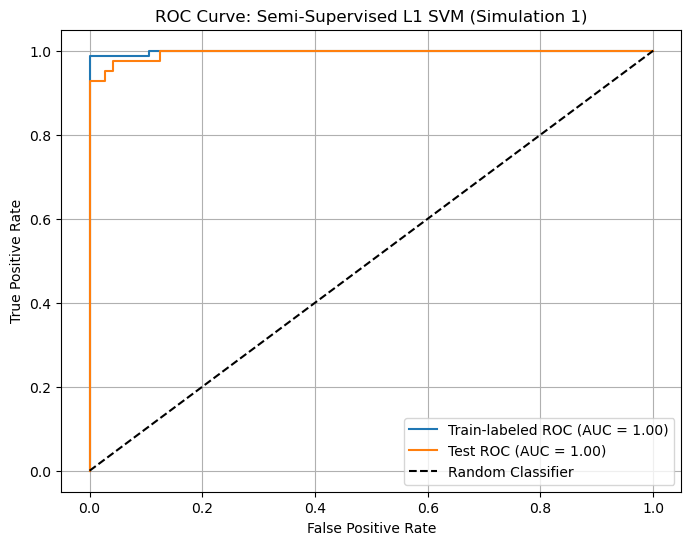

Confusion Matrices (Simulation 1)
Labeled Training Confusion Matrix:
[[142   0]
 [  2  83]]
Test Confusion Matrix:
[[70  2]
 [ 3 39]]


In [18]:
#select 50% of the positive class along with 50% of the negative class in the training set as labeled data
#the rest as unlabelled data. You can select them randomly.
#Train an L1-penalized SVM to classify the labeled data. Use normalized
#data. Choose the penalty parameter using 5 fold cross validation.

#Monte Carlo runs
M=30

#store metric results
semi_train_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}
semi_test_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}

#store one simulations results for plotting
save_first_sim = {}

print('Starting Semi-Supervised Learning Monte Carlo Simulation with M=30 runs, using 5% of each class as labeled data in the training set')
for run_idx in range(M):
    print(f'Run {run_idx+1}/{M}')

    #create a different train/test split for each of the M=30 runs
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=run_idx)

    #normalize data for each split
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    #seperate positive and negative classes in training set
    pos_indices = np.where(y_train == 1)[0]
    neg_indices = np.where(y_train == 0)[0]
    
    #randomly select 50%  from each class as labeled data
    np.random.seed(run_idx)
    n_pos_labeled = np.random.choice(pos_indices, size=len(pos_indices)//2, replace=False)
    n_neg_labeled = np.random.choice(neg_indices, size=len(neg_indices)//2, replace=False)

    labeled_indices = np.concatenate([n_pos_labeled, n_neg_labeled])
    unlabeled_indices = np.array([i for i in range(len(y_train)) if i not in labeled_indices])

    x_train_labeled = x_train_scaled[labeled_indices]
    y_train_labeled = y_train.iloc[labeled_indices].values

    print(f'  Labeled: {len(y_train_labeled)} samples (M:{sum(y_train_labeled==1)}, B:{sum(y_train_labeled==0)})')
    print(f'  Unlabeled: {len(y_train) - len(y_train_labeled)} samples')

    #define L1 penalized SVM
    params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    l1_svm = LinearSVC(penalty='l1', dual=False, max_iter = 10000, random_state=42)

    #5 fold CV to choose penalty parameter C
    grid_search = GridSearchCV(l1_svm, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(x_train_labeled, y_train_labeled)

    best_svm = grid_search.best_estimator_
    print(f'Best C parameter: {grid_search.best_params_["C"]}')

    #make predictions on labeled training data and full test set
    y_train_labeled_pred = best_svm.predict(x_train_labeled)
    y_test_pred = best_svm.predict(x_test_scaled)
    y_train_labeled_scores = best_svm.decision_function(x_train_labeled)
    y_test_scores = best_svm.decision_function(x_test_scaled)

    #calculate metrics for labeled training set
    semi_train_metrics['accuracy'].append(accuracy_score(y_train_labeled, y_train_labeled_pred))
    semi_train_metrics['precision'].append(precision_score(y_train_labeled, y_train_labeled_pred))
    semi_train_metrics['recall'].append(recall_score(y_train_labeled, y_train_labeled_pred))
    semi_train_metrics['f1'].append(f1_score(y_train_labeled, y_train_labeled_pred))
    semi_train_metrics['roc_auc'].append(roc_auc_score(y_train_labeled, y_train_labeled_scores))

    #calculate metrics for unlabeled test set
    semi_test_metrics['accuracy'].append(accuracy_score(y_test, y_test_pred))
    semi_test_metrics['precision'].append(precision_score(y_test, y_test_pred))
    semi_test_metrics['recall'].append(recall_score(y_test, y_test_pred))
    semi_test_metrics['f1'].append(f1_score(y_test, y_test_pred))
    semi_test_metrics['roc_auc'].append(roc_auc_score(y_test, y_test_scores))

    #save first run results for ROC plot and CM
    if run_idx == 0:
        save_first_sim = {'y_train_labeled': y_train_labeled, 'y_train_labeled_pred': y_train_labeled_pred, 'y_train_labeled_scores': y_train_labeled_scores, 'y_test': y_test, 'y_test_pred': y_test_pred, 'y_test_scores': y_test_scores}

print('SUMMARY OF RESULTS: AVERAGE OVER 30 RUNS')
#average metrics over M=30 runs
print('Average Labeled Training Metrics:')
for metric in semi_train_metrics:
    avg_value = np.mean(semi_train_metrics[metric])
    std_value = np.std(semi_train_metrics[metric])
    print(f' {metric:10s}: {avg_value:.4f} ± {std_value:.4f}')

print('Average Test Metrics:')
for metric in semi_train_metrics:
    avg_value = np.mean(semi_test_metrics[metric])
    std_value = np.std(semi_test_metrics[metric])
    print(f' {metric:10s}: {avg_value:.4f} ± {std_value:.4f}')

#Plot ROC Curve for 1st run
plt.figure(figsize=(8,6))

fpr_train, tpr_train, _ = roc_curve(save_first_sim['y_train_labeled'], save_first_sim['y_train_labeled_scores'])
fpr_test, tpr_test, _ = roc_curve(save_first_sim['y_test'], save_first_sim['y_test_scores'])
semi_train_auc = roc_auc_score(save_first_sim['y_train_labeled'], save_first_sim['y_train_labeled_scores'])
semi_test_auc = roc_auc_score(save_first_sim['y_test'], save_first_sim['y_test_scores'])

plt.plot(fpr_train, tpr_train, label=f'Train-labeled ROC (AUC = {semi_train_auc:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {semi_test_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Semi-Supervised L1 SVM (Simulation 1)')
plt.legend()
plt.grid()
plt.show()

#Confusion Matrix for 1st run
print('Confusion Matrices (Simulation 1)')
cm_semi_train = confusion_matrix(save_first_sim['y_train_labeled'], save_first_sim['y_train_labeled_pred'])
cm_semi_test = confusion_matrix(save_first_sim['y_test'], save_first_sim['y_test_pred'])

print('Labeled Training Confusion Matrix:')
print(cm_semi_train)

print('Test Confusion Matrix:')
print(cm_semi_test)


##### (B)

Starting Part B: Semi-Supervised Learning Monte Carlo Simulation with M=30 runs, iteratively adding most confident unlabeled data points
Run 1/30
Unlabeled data points: 228
  Iteration 50: Labeled=277, Unlabeled=178
  Iteration 100: Labeled=327, Unlabeled=128
  Iteration 150: Labeled=377, Unlabeled=78
  Iteration 200: Labeled=427, Unlabeled=28
  Iteration 228: Labeled=455, Unlabeled=0
Final best C parameter: 0.1
Run 2/30
Unlabeled data points: 228
  Iteration 50: Labeled=277, Unlabeled=178
  Iteration 100: Labeled=327, Unlabeled=128
  Iteration 150: Labeled=377, Unlabeled=78
  Iteration 200: Labeled=427, Unlabeled=28
  Iteration 228: Labeled=455, Unlabeled=0
Final best C parameter: 0.1
Run 3/30
Unlabeled data points: 228
  Iteration 50: Labeled=277, Unlabeled=178
  Iteration 100: Labeled=327, Unlabeled=128
  Iteration 150: Labeled=377, Unlabeled=78
  Iteration 200: Labeled=427, Unlabeled=28
  Iteration 228: Labeled=455, Unlabeled=0
Final best C parameter: 1
Run 4/30
Unlabeled data poin

c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


  Iteration 100: Labeled=327, Unlabeled=128
  Iteration 150: Labeled=377, Unlabeled=78
  Iteration 200: Labeled=427, Unlabeled=28
  Iteration 228: Labeled=455, Unlabeled=0
Final best C parameter: 0.1
Results Summary: Average over 30 runs
Average Training Metrics:
 accuracy  : 0.9930 ± 0.0044
 precision : 0.9974 ± 0.0040
 recall    : 0.9836 ± 0.0102
 f1        : 0.9905 ± 0.0060
 roc_auc   : 0.9986 ± 0.0013
Average Test Metrics:
 accuracy  : 0.9623 ± 0.0149
 precision : 0.9721 ± 0.0215
 recall    : 0.9246 ± 0.0354
 f1        : 0.9473 ± 0.0214
 roc_auc   : 0.9922 ± 0.0075


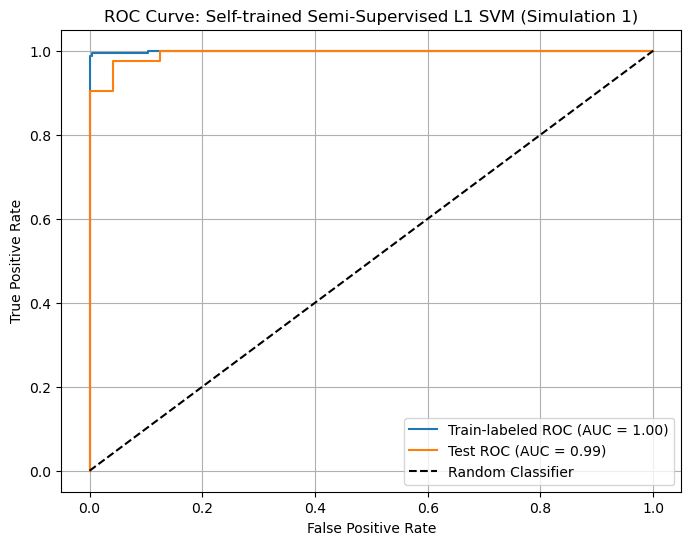

Training Confusion Matrix: [[289   0]
 [  2 164]]
Test Confusion Matrix: [[69  3]
 [ 3 39]]


In [20]:
#Find the unlabeled data point that is the farthest to the decision boundary
#of the SVM. Let the SVM label it (ignore its true label), and add it to
#the labeled data, and retrain the SVM. Continue this process until all
#unlabeled data are used. Test the final SVM on the test data andthe
#average accuracy, precision, recall, F1-score, and AUC, for both training
#and test sets over your M runs. Plot the ROC and report the confusion
#matrix for training and testing in one of the runs.

#Monte Carlo runs
M=30

#store metric results
unlab_train_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}
unlab_test_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}

#store one simulations results for plotting
save_first_sim = {}

print('Starting Part B: Semi-Supervised Learning Monte Carlo Simulation with M=30 runs, iteratively adding most confident unlabeled data points')
for run_idx in range(M):
    print(f'Run {run_idx+1}/{M}')

    #create a different train/test split for each of the M=30 runs
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=run_idx)

#normalize data for each split
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    #seperate positive and negative classes in training set
    pos_indices = np.where(y_train == 1)[0]
    neg_indices = np.where(y_train == 0)[0]
    
    #randomly select 50%  from each class as labeled data
    np.random.seed(run_idx)
    n_pos_labeled = np.random.choice(pos_indices, size=len(pos_indices)//2, replace=False)
    n_neg_labeled = np.random.choice(neg_indices, size=len(neg_indices)//2, replace=False)

    labeled_indices = np.concatenate([n_pos_labeled, n_neg_labeled])
    unlabeled_indices = np.array([i for i in range(len(y_train)) if i not in labeled_indices])

    #reuse labeled dataset from part A
    x_train_labeled = x_train_scaled[labeled_indices]
    y_train_labeled= y_train.iloc[labeled_indices].values

    x_train_unlabeled = x_train_scaled[unlabeled_indices]
    y_train_unlabeled = y_train.iloc[unlabeled_indices].values

    print(f'Unlabeled data points: {len(x_train_unlabeled)}')

    #self training SVM adding each unlabeled data point
    iter = 0 
    while len(x_train_unlabeled) > 0:
        #train l1 penalized SVM on labeled data (reduced params for processing speed)
        params = {'C': [0.01, 0.1, 1, 10]}
        l1_svm = LinearSVC(penalty='l1', dual=False, max_iter=10000, random_state=42)

        grid_search = GridSearchCV(l1_svm, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
        grid_search.fit(x_train_labeled, y_train_labeled)

        best_svm = grid_search.best_estimator_

        #decision function score for unlabeled data
        unlabeled_scores = best_svm.decision_function(x_train_unlabeled)

        #find the point FARTHEST from decision boundry (max absolute distance)
        abs_score = np.abs(unlabeled_scores)
        farthest_d = np.argmax(abs_score)

        #get predicition for this data point
        predicted_label = best_svm.predict(x_train_unlabeled[farthest_d:farthest_d+1])[0]

        #add point to labeled data
        x_train_labeled = np.vstack([x_train_labeled, x_train_unlabeled[farthest_d]])
        y_train_labeled = np.append(y_train_labeled, predicted_label)

        #remove from unlabeled dataset
        x_train_unlabeled = np.delete(x_train_unlabeled, farthest_d, axis=0)
        y_train_unlabeled = np.delete(y_train_unlabeled, farthest_d)

        iter += 1
        if iter % 50 == 0 or len(x_train_unlabeled) == 0:
            print(f'  Iteration {iter}: Labeled={len(y_train_labeled)}, Unlabeled={len(x_train_unlabeled)}')

    #final training model on all data (now all labeled) - reduced params for processing speed
    params = {'C': [0.01, 0.1, 1, 10]}
    final_svm = LinearSVC(penalty='l1', dual=False, max_iter=10000, random_state=42)

    grid_search = GridSearchCV(final_svm, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(x_train_labeled, y_train_labeled)

    final_labeled_svm = grid_search.best_estimator_
    print(f'Final best C parameter: {grid_search.best_params_["C"]}')

    #predict on full training and test set
    y_train_final_pred = final_labeled_svm.predict(x_train_labeled)
    y_test_pred = final_labeled_svm.predict(x_test_scaled)
    y_train_final_scores = final_labeled_svm.decision_function(x_train_labeled)
    y_test_scores = final_labeled_svm.decision_function(x_test_scaled)
        
    # Calculate metrics for full training set (after self-training)
    unlab_train_metrics['accuracy'].append(accuracy_score(y_train_labeled, y_train_final_pred))
    unlab_train_metrics['precision'].append(precision_score(y_train_labeled, y_train_final_pred))
    unlab_train_metrics['recall'].append(recall_score(y_train_labeled, y_train_final_pred))
    unlab_train_metrics['f1'].append(f1_score(y_train_labeled, y_train_final_pred))
    unlab_train_metrics['roc_auc'].append(roc_auc_score(y_train_labeled, y_train_final_scores))
        
    # Calculate metrics for test set
    unlab_test_metrics['accuracy'].append(accuracy_score(y_test, y_test_pred))
    unlab_test_metrics['precision'].append(precision_score(y_test, y_test_pred))
    unlab_test_metrics['recall'].append(recall_score(y_test, y_test_pred))
    unlab_test_metrics['f1'].append(f1_score(y_test, y_test_pred))
    unlab_test_metrics['roc_auc'].append(roc_auc_score(y_test, y_test_scores))

    #save first run results for ROC plot and CM
    if run_idx == 0:
        save_first_sim = {'y_train': y_train_labeled, 'y_train_pred': y_train_final_pred, 'y_train_scores': y_train_final_scores, 'y_test': y_test, 'y_test_pred': y_test_pred, 'y_test_scores': y_test_scores}

#Summary of M=30 run results
print('Results Summary: Average over 30 runs')

#avg metrics over M=30 runs
print('Average Training Metrics:')
for metric in unlab_train_metrics:
    avg_value = np.mean(unlab_train_metrics[metric])
    std_value = np.std(unlab_train_metrics[metric])
    print(f' {metric:10s}: {avg_value:.4f} ± {std_value:.4f}')

print('Average Test Metrics:')
for metric in unlab_test_metrics:
    avg_value = np.mean(unlab_test_metrics[metric])
    std_value = np.std(unlab_test_metrics[metric])
    print(f' {metric:10s}: {avg_value:.4f} ± {std_value:.4f}')

#plot ROC curve for first simulation
plt.figure(figsize=(8,6))

fpr_train, tpr_train, _ = roc_curve(save_first_sim['y_train'], save_first_sim['y_train_scores'])
fpr_test, tpr_test, _ = roc_curve(save_first_sim['y_test'], save_first_sim['y_test_scores'])
train_auc = roc_auc_score(save_first_sim['y_train'], save_first_sim['y_train_scores'])
test_auc = roc_auc_score(save_first_sim['y_test'], save_first_sim['y_test_scores'])

plt.plot(fpr_train, tpr_train, label=f'Train-labeled ROC (AUC = {train_auc:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {test_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Self-trained Semi-Supervised L1 SVM (Simulation 1)')
plt.legend()
plt.grid()
plt.show()

#print confusion matrices
cm_train = confusion_matrix(save_first_sim['y_train'], save_first_sim['y_train_pred'])
cm_test = confusion_matrix(save_first_sim['y_test'], save_first_sim['y_test_pred'])

print('Training Confusion Matrix:', cm_train)
print('Test Confusion Matrix:', cm_test)

#### (iii) Unsupervised Learning

##### (A)

In [ ]:
#Run k-means algorithm on the whole training set. 
#Ignore the labels of the data, and assume k = 2.
#Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. 
#How do you make sure that the algorithm was not trapped in a local minimum?

print('Use scikit-learn KMeans with n_init parameter set to a random value to run the algorithm multiple times with different centroid seeds.')
print(f'Training on {len(y_train)} samples and ignoring labels.')
print(f'Testing on {len(y_test)} samples')

#Monte Carlo Simulations
M=30
train_metrics_km = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'ari': [], 'nmi': []}
test_metrics_km = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'ari': [], 'nmi': []}

for run_idx in range(M):
    print(f'KMeans Run {run_idx+1}/{M}')
    kmeans = KMeans(n_clusters=2, n_init=10, init='random', random_state=run_idx, max_iter=300)
    kmeans.fit(x_train_scaled)

    #predictions
    y_train_clusters = kmeans.predict(x_train_scaled)
    y_test_clusters = kmeans.predict(x_test_scaled)

    #map cluster labels to original labels to check for accuracy
    #clsuter 0 --> label 0, cluster 1--> label 1
    acc_train_1 = accuracy_score(y_train, y_train_clusters)
    acc_test_1 = accuracy_score(y_test, y_test_clusters)

    #cluster 0 --> label 1, cluster 1--> label 0
    y_train_clusters_flip = 1 - y_train_clusters
    y_test_clusters_flip = 1 - y_test_clusters
    acc_test_2 = accuracy_score(y_test, y_test_clusters_flip)
    acc_train_2 = accuracy_score(y_train, y_train_clusters_flip)

    #choose best mapping
    if acc_train_1 >= acc_train_2:
        y_train_pred = y_train_clusters
        y_test_pred = y_test_clusters
    else:
        y_train_pred = y_train_clusters_flip
        y_test_pred = y_test_clusters_flip

    print(f'Cluster centers: {kmeans.cluster_centers_.shape}')

    #calculate training metrics
    train_metrics_km['accuracy'].append(accuracy_score(y_train, y_train_pred))
    train_metrics_km['precision'].append(precision_score(y_train, y_train_pred))
    train_metrics_km['recall'].append(recall_score(y_train, y_train_pred))
    train_metrics_km['f1'].append(f1_score(y_train, y_train_pred))
    train_metrics_km['ari'].append(adjusted_rand_score(y_train, y_train_pred))
    train_metrics_km['nmi'].append(normalized_mutual_info_score(y_train, y_train_pred))

    #calculate test metrics
    test_metrics_km['accuracy'].append(accuracy_score(y_test, y_test_pred))
    test_metrics_km['precision'].append(precision_score(y_test, y_test_pred))
    test_metrics_km['recall'].append(recall_score(y_test, y_test_pred))
    test_metrics_km['f1'].append(f1_score(y_test, y_test_pred))
    test_metrics_km['ari'].append(adjusted_rand_score(y_test, y_test_pred))
    test_metrics_km['nmi'].append(normalized_mutual_info_score(y_test, y_test_pred))

#average metrics over M=30 runs
print('SUMMARY OF KMEANS RESULTS')
print('Training Metrics:')
for metric in train_metrics_km:
    avg_value = np.mean(train_metrics_km[metric])
    std_value = np.std(train_metrics_km[metric])
    print(f'{metric}: {avg_value:.4f} ± {std_value:.4f}')

print('Test Metrics:')
for metric in test_metrics_km:
    avg_value = np.mean(test_metrics_km[metric])
    std_value = np.std(test_metrics_km[metric])
    print(f'{metric}: {avg_value:.4f} ± {std_value:.4f}')
    


Use scikit-learn KMeans with n_init parameter set to a random value to run the algorithm multiple times with different centroid seeds.
Training on 455 samples and ignoring labels.
Testing on 114 samples
KMeans Run 1/30
Cluster centers: (2, 30)
KMeans Run 2/30
Cluster centers: (2, 30)
KMeans Run 3/30


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Cluster centers: (2, 30)
KMeans Run 4/30
Cluster centers: (2, 30)
KMeans Run 5/30
Cluster centers: (2, 30)


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans Run 6/30
Cluster centers: (2, 30)
KMeans Run 7/30
Cluster centers: (2, 30)


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans Run 8/30
Cluster centers: (2, 30)
KMeans Run 9/30
Cluster centers: (2, 30)
KMeans Run 10/30
Cluster centers: (2, 30)
KMeans Run 11/30
Cluster centers: (2, 30)
KMeans Run 12/30


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Cluster centers: (2, 30)
KMeans Run 13/30
Cluster centers: (2, 30)
KMeans Run 14/30


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Cluster centers: (2, 30)
KMeans Run 15/30
Cluster centers: (2, 30)
KMeans Run 16/30
Cluster centers: (2, 30)


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans Run 17/30
Cluster centers: (2, 30)
KMeans Run 18/30
Cluster centers: (2, 30)


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans Run 19/30
Cluster centers: (2, 30)
KMeans Run 20/30
Cluster centers: (2, 30)
KMeans Run 21/30
Cluster centers: (2, 30)


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans Run 22/30
Cluster centers: (2, 30)
KMeans Run 23/30
Cluster centers: (2, 30)
KMeans Run 24/30
Cluster centers: (2, 30)
KMeans Run 25/30
Cluster centers: (2, 30)


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans Run 26/30
Cluster centers: (2, 30)
KMeans Run 27/30
Cluster centers: (2, 30)


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans Run 28/30
Cluster centers: (2, 30)
KMeans Run 29/30
Cluster centers: (2, 30)


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans Run 30/30
Cluster centers: (2, 30)
SUMMARY OF KMEANS RESULTS
Training Metrics:
accuracy: 0.9081 ± 0.0013
precision: 0.9397 ± 0.0039
recall: 0.8059 ± 0.0000
f1: 0.8676 ± 0.0017
ari: 0.6629 ± 0.0043
nmi: 0.5544 ± 0.0062
Test Metrics:
accuracy: 0.9386 ± 0.0000
precision: 0.9268 ± 0.0000
recall: 0.9048 ± 0.0000
f1: 0.9157 ± 0.0000
ari: 0.7664 ± 0.0000
nmi: 0.6527 ± 0.0000


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


##### (B)

Starting Part B: Majority voting from 30 closest points to each KMeans Center.
Run 1/30
Computed cluster centers.
 Cluster 0: 30 closest points voted. Class 0: 30, Class 1: 0, Majority Label: 0
 Cluster 1: 30 closest points voted. Class 0: 0, Class 1: 30, Majority Label: 1
Run 2/30
Computed cluster centers.
 Cluster 0: 30 closest points voted. Class 0: 30, Class 1: 0, Majority Label: 0
 Cluster 1: 30 closest points voted. Class 0: 0, Class 1: 30, Majority Label: 1
Run 3/30
Computed cluster centers.
 Cluster 0: 30 closest points voted. Class 0: 30, Class 1: 0, Majority Label: 0
 Cluster 1: 30 closest points voted. Class 0: 0, Class 1: 30, Majority Label: 1
Run 4/30
Computed cluster centers.
 Cluster 0: 30 closest points voted. Class 0: 0, Class 1: 30, Majority Label: 1
 Cluster 1: 30 closest points voted. Class 0: 30, Class 1: 0, Majority Label: 0
Run 5/30
Computed cluster centers.
 Cluster 0: 30 closest points voted. Class 0: 30, Class 1: 0, Majority Label: 0
 Cluster 1: 30 closest poi

c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

Computed cluster centers.
 Cluster 0: 30 closest points voted. Class 0: 0, Class 1: 30, Majority Label: 1
 Cluster 1: 30 closest points voted. Class 0: 30, Class 1: 0, Majority Label: 0
Run 7/30
Computed cluster centers.
 Cluster 0: 30 closest points voted. Class 0: 0, Class 1: 30, Majority Label: 1
 Cluster 1: 30 closest points voted. Class 0: 30, Class 1: 0, Majority Label: 0
Run 8/30
Computed cluster centers.
 Cluster 0: 30 closest points voted. Class 0: 0, Class 1: 30, Majority Label: 1
 Cluster 1: 30 closest points voted. Class 0: 30, Class 1: 0, Majority Label: 0
Run 9/30
Computed cluster centers.
 Cluster 0: 30 closest points voted. Class 0: 30, Class 1: 0, Majority Label: 0
 Cluster 1: 30 closest points voted. Class 0: 0, Class 1: 30, Majority Label: 1
Run 10/30
Computed cluster centers.
 Cluster 0: 30 closest points voted. Class 0: 30, Class 1: 0, Majority Label: 0
 Cluster 1: 30 closest points voted. Class 0: 0, Class 1: 30, Majority Label: 1
Run 11/30


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

Computed cluster centers.
 Cluster 0: 30 closest points voted. Class 0: 0, Class 1: 30, Majority Label: 1
 Cluster 1: 30 closest points voted. Class 0: 30, Class 1: 0, Majority Label: 0
Run 12/30
Computed cluster centers.
 Cluster 0: 30 closest points voted. Class 0: 30, Class 1: 0, Majority Label: 0
 Cluster 1: 30 closest points voted. Class 0: 0, Class 1: 30, Majority Label: 1
Run 13/30
Computed cluster centers.
 Cluster 0: 30 closest points voted. Class 0: 0, Class 1: 30, Majority Label: 1
 Cluster 1: 30 closest points voted. Class 0: 30, Class 1: 0, Majority Label: 0
Run 14/30
Computed cluster centers.
 Cluster 0: 30 closest points voted. Class 0: 30, Class 1: 0, Majority Label: 0
 Cluster 1: 30 closest points voted. Class 0: 0, Class 1: 30, Majority Label: 1
Run 15/30
Computed cluster centers.
 Cluster 0: 30 closest points voted. Class 0: 30, Class 1: 0, Majority Label: 0
 Cluster 1: 30 closest points voted. Class 0: 0, Class 1: 30, Majority Label: 1
Run 16/30
Computed cluster cen

c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

 Cluster 0: 30 closest points voted. Class 0: 30, Class 1: 0, Majority Label: 0
 Cluster 1: 30 closest points voted. Class 0: 0, Class 1: 30, Majority Label: 1
Run 17/30
Computed cluster centers.
 Cluster 0: 30 closest points voted. Class 0: 30, Class 1: 0, Majority Label: 0
 Cluster 1: 30 closest points voted. Class 0: 0, Class 1: 30, Majority Label: 1
Run 18/30
Computed cluster centers.
 Cluster 0: 30 closest points voted. Class 0: 30, Class 1: 0, Majority Label: 0
 Cluster 1: 30 closest points voted. Class 0: 0, Class 1: 30, Majority Label: 1
Run 19/30
Computed cluster centers.
 Cluster 0: 30 closest points voted. Class 0: 30, Class 1: 0, Majority Label: 0
 Cluster 1: 30 closest points voted. Class 0: 0, Class 1: 30, Majority Label: 1
Run 20/30
Computed cluster centers.
 Cluster 0: 30 closest points voted. Class 0: 0, Class 1: 30, Majority Label: 1
 Cluster 1: 30 closest points voted. Class 0: 30, Class 1: 0, Majority Label: 0
Run 21/30
Computed cluster centers.
 Cluster 0: 30 close

c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

Run 22/30
Computed cluster centers.
 Cluster 0: 30 closest points voted. Class 0: 30, Class 1: 0, Majority Label: 0
 Cluster 1: 30 closest points voted. Class 0: 0, Class 1: 30, Majority Label: 1
Run 23/30
Computed cluster centers.
 Cluster 0: 30 closest points voted. Class 0: 30, Class 1: 0, Majority Label: 0
 Cluster 1: 30 closest points voted. Class 0: 0, Class 1: 30, Majority Label: 1
Run 24/30
Computed cluster centers.
 Cluster 0: 30 closest points voted. Class 0: 0, Class 1: 30, Majority Label: 1
 Cluster 1: 30 closest points voted. Class 0: 30, Class 1: 0, Majority Label: 0
Run 25/30
Computed cluster centers.
 Cluster 0: 30 closest points voted. Class 0: 30, Class 1: 0, Majority Label: 0
 Cluster 1: 30 closest points voted. Class 0: 0, Class 1: 30, Majority Label: 1
Run 26/30
Computed cluster centers.


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

 Cluster 0: 30 closest points voted. Class 0: 30, Class 1: 0, Majority Label: 0
 Cluster 1: 30 closest points voted. Class 0: 0, Class 1: 30, Majority Label: 1
Run 27/30
Computed cluster centers.
 Cluster 0: 30 closest points voted. Class 0: 0, Class 1: 30, Majority Label: 1
 Cluster 1: 30 closest points voted. Class 0: 30, Class 1: 0, Majority Label: 0
Run 28/30
Computed cluster centers.
 Cluster 0: 30 closest points voted. Class 0: 0, Class 1: 30, Majority Label: 1
 Cluster 1: 30 closest points voted. Class 0: 30, Class 1: 0, Majority Label: 0
Run 29/30


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

Computed cluster centers.
 Cluster 0: 30 closest points voted. Class 0: 0, Class 1: 30, Majority Label: 1
 Cluster 1: 30 closest points voted. Class 0: 30, Class 1: 0, Majority Label: 0
Run 30/30
Computed cluster centers.
 Cluster 0: 30 closest points voted. Class 0: 30, Class 1: 0, Majority Label: 0
 Cluster 1: 30 closest points voted. Class 0: 0, Class 1: 30, Majority Label: 1
KMeans Summary: Average over 30 runs
Average Training Metrics:
 accuracy  : 0.9103 ± 0.0058
 precision : 0.9237 ± 0.0152
 recall    : 0.8286 ± 0.0159
 f1        : 0.8734 ± 0.0084
 roc_auc   : 0.9748 ± 0.0030
Average Test Metrics:
 accuracy  : 0.9056 ± 0.0205
 precision : 0.9097 ± 0.0317
 recall    : 0.8270 ± 0.0521
 f1        : 0.8652 ± 0.0323
 roc_auc   : 0.9718 ± 0.0122


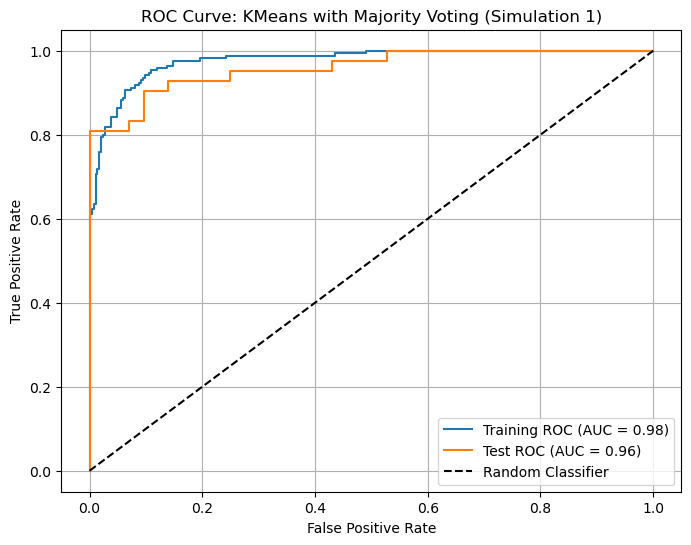

Confusion Matrices for Run 1
Training Confusion Matrix: [[277   8]
 [ 33 137]]
Test Confusion Matrix: [[65  7]
 [ 7 35]]


In [ ]:
#B. Compute the centers of the two clusters and find the closest 30 data
#points to each center. Read the true labels of those 30 data points and
#take a majority poll within them. The majority poll becomes the label
#predicted by k-means for the members of each cluster. Then compare the
#labels provided by k-means with the true labels of the training data and
#report the average accuracy, precision, recall, F1-score, and AUC over M
#runs, and ROC and the confusion matrix for one of the runs.

print('Starting Part B: Majority voting from 30 closest points to each KMeans Center.')

#Monte Carlo runs
M=30

#store metric results
kmb_train_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}
kmb_test_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}

#store one simulations results for plotting
save_first_sim = {}

for run_idx in range(M):
    print(f'Run {run_idx+1}/{M}')

    #create a different train/test split for each of the M=30 runs
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=run_idx)

    #normalize data for each split
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    #KMeans with k=2
    kmeans_b = KMeans(n_clusters=2, n_init=10, init='random', random_state=run_idx, max_iter=1000)
    kmeans_b.fit(x_train_scaled)

    #get cluster centers
    centers = kmeans_b.cluster_centers_
    print('Computed cluster centers.')

    #cluster assignments for training data
    y_train_clusters_b = kmeans_b.predict(x_train_scaled)
   
    #for each cluster, find 30 closest points and conduct majority voting
    cluster_labels = {}

    for cluster_id in range(2):
        #calc distances from all training pts to cluster center
        distances = cdist(x_train_scaled, centers[cluster_id:cluster_id+1], metric='euclidean').flatten()

        #find indices of 30 closest pts
        closest_30_indices = np.argsort(distances)[:30]

        #get true labels of these 30 pts
        closest_labels = y_train.iloc[closest_30_indices].values

        #majority vote
        vote_0 = np.sum(closest_labels == 0)
        vote_1 = np.sum(closest_labels == 1)

        cluster_labels[cluster_id] = 1 if vote_1 > vote_0 else 0
        print(f' Cluster {cluster_id}: 30 closest points voted. Class 0: {vote_0}, Class 1: {vote_1}, Majority Label: {cluster_labels[cluster_id]}')
    
    #map cluster assignments to predicted labels
    y_train_pred = np.array([cluster_labels[c] for c in y_train_clusters_b])

    ### PART C: Classify test data based on proximity to cluster centers ###
    #get predictions for test set
    y_test_clusters = kmeans_b.predict(x_test_scaled)
    y_test_pred = np.array([cluster_labels[c] for c in y_test_clusters])

    #calculate decision scores for ROC/AUC
    train_dist_to_centers = cdist(x_train_scaled, centers, metric='euclidean')
    test_dist_to_centers = cdist(x_test_scaled, centers, metric='euclidean')

    if cluster_labels[0] == 0 and cluster_labels[1] == 1:
        #cluster 0 = benign, cluster 1 = malignant
        y_train_scores = train_dist_to_centers[:, 0] - train_dist_to_centers[:, 1]
        y_test_scores = test_dist_to_centers[:, 0] - test_dist_to_centers[:, 1]
    else:
        #cluster 0 =malignant, cluster 1 = benign
        y_train_scores = train_dist_to_centers[:, 1] - train_dist_to_centers[:, 0]
        y_test_scores = test_dist_to_centers[:, 1] - test_dist_to_centers[:, 0]
        
    # Calculate metrics for training data
    kmb_train_metrics['accuracy'].append(accuracy_score(y_train, y_train_pred))
    kmb_train_metrics['precision'].append(precision_score(y_train, y_train_pred, zero_division=0))
    kmb_train_metrics['recall'].append(recall_score(y_train, y_train_pred, zero_division=0))
    kmb_train_metrics['f1'].append(f1_score(y_train, y_train_pred, zero_division=0))
    kmb_train_metrics['roc_auc'].append(roc_auc_score(y_train, y_train_scores))
        
    # Calculate metrics for test set
    kmb_test_metrics['accuracy'].append(accuracy_score(y_test, y_test_pred))
    kmb_test_metrics['precision'].append(precision_score(y_test, y_test_pred, zero_division=0))
    kmb_test_metrics['recall'].append(recall_score(y_test, y_test_pred, zero_division=0))
    kmb_test_metrics['f1'].append(f1_score(y_test, y_test_pred, zero_division=0))
    kmb_test_metrics['roc_auc'].append(roc_auc_score(y_test, y_test_scores))
     
    #save first run results for ROC plot and CM
    if run_idx == 0:
        save_first_sim = {'y_train': y_train, 'y_train_pred': y_train_pred, 'y_train_scores': y_train_scores, 'y_test': y_test, 'y_test_pred': y_test_pred, 'y_test_scores': y_test_scores}

#Summary of M=30 run results
print('KMeans Summary: Average over 30 runs')

#avg metrics over M=30 runs
print('Average Training Metrics:')
for metric in kmb_train_metrics:
    avg_value = np.mean(kmb_train_metrics[metric])
    std_value = np.std(kmb_train_metrics[metric])
    print(f' {metric:10s}: {avg_value:.4f} ± {std_value:.4f}')

print('Average Test Metrics:')
for metric in kmb_test_metrics:
    avg_value = np.mean(kmb_test_metrics[metric])
    std_value = np.std(kmb_test_metrics[metric])
    print(f' {metric:10s}: {avg_value:.4f} ± {std_value:.4f}')

#plot ROC curve for first simulation
plt.figure(figsize=(8,6))

fpr_train, tpr_train, _ = roc_curve(save_first_sim['y_train'], save_first_sim['y_train_scores'])
fpr_test, tpr_test, _ = roc_curve(save_first_sim['y_test'], save_first_sim['y_test_scores'])
train_auc = roc_auc_score(save_first_sim['y_train'], save_first_sim['y_train_scores'])
test_auc = roc_auc_score(save_first_sim['y_test'], save_first_sim['y_test_scores'])

plt.plot(fpr_train, tpr_train, label=f'Training ROC (AUC = {train_auc:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {test_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: KMeans with Majority Voting (Simulation 1)')
plt.legend()
plt.grid()
plt.show()

#print confusion matrices
print('Confusion Matrices for Run 1')
cm_train = confusion_matrix(save_first_sim['y_train'], save_first_sim['y_train_pred'])
cm_test = confusion_matrix(save_first_sim['y_test'], save_first_sim['y_test_pred'])

print('Training Confusion Matrix:', cm_train)
print('Test Confusion Matrix:', cm_test)

#### (iv) Spectral Clustering

In [ ]:
#Classify test data based on their proximity to the centers of the clusters.
#Report the average accuracy, precision, recall, F1-score, and AUC over
#M runs, and ROC and the confusion matrix for one of the runs for the
#test data.

####PART C INCLUDED IN PART B CODE ABOVE: USED KMEANS.PREDICT TO ASSIGN TEST PTS TO NEAREST CLUSTER CENTER###


#### (iv) Compare

In [26]:
#One can expect that supervised learning on the full data set works better than
#semi-supervised learning with half of the data set labeled.One can expect that
#unsupervised learning underperforms in such situations. Compare the results
#you obtained by those methods.

#SUMMARY TABLE OF AVERAGE METRICS
methods = [
    'Supervised (Full Data)',
    'Semi-Supervised A (50% Labeled)',
    'Semi-Supervised B (Self-Training)',
    'Unsupervised A (K-Means)',
    'Unsupervised B/C (K-Means Voting)']

# Calculate means and stds for each method
results_train = []
results_test = []

#Supervised
results_train.append({
    'Method': methods[0],
    'Accuracy': f"{np.mean(train_metrics['accuracy']):.4f} ± {np.std(train_metrics['accuracy']):.4f}",
    'Precision': f"{np.mean(train_metrics['precision']):.4f} ± {np.std(train_metrics['precision']):.4f}",
    'Recall': f"{np.mean(train_metrics['recall']):.4f} ± {np.std(train_metrics['recall']):.4f}",
    'F1-Score': f"{np.mean(train_metrics['f1']):.4f} ± {np.std(train_metrics['f1']):.4f}",
    'AUC': f"{np.mean(train_metrics['roc_auc']):.4f} ± {np.std(train_metrics['roc_auc']):.4f}"})

results_test.append({
    'Method': methods[0],
    'Accuracy': f"{np.mean(test_metrics['accuracy']):.4f} ± {np.std(test_metrics['accuracy']):.4f}",
    'Precision': f"{np.mean(test_metrics['precision']):.4f} ± {np.std(test_metrics['precision']):.4f}",
    'Recall': f"{np.mean(test_metrics['recall']):.4f} ± {np.std(test_metrics['recall']):.4f}",
    'F1-Score': f"{np.mean(test_metrics['f1']):.4f} ± {np.std(test_metrics['f1']):.4f}",
    'AUC': f"{np.mean(test_metrics['roc_auc']):.4f} ± {np.std(test_metrics['roc_auc']):.4f}"})

#Semi-Supervised Part A
results_train.append({
    'Method': methods[1],
    'Accuracy': f"{np.mean(semi_train_metrics['accuracy']):.4f} ± {np.std(semi_train_metrics['accuracy']):.4f}",
    'Precision': f"{np.mean(semi_train_metrics['precision']):.4f} ± {np.std(semi_train_metrics['precision']):.4f}",
    'Recall': f"{np.mean(semi_train_metrics['recall']):.4f} ± {np.std(semi_train_metrics['recall']):.4f}",
    'F1-Score': f"{np.mean(semi_train_metrics['f1']):.4f} ± {np.std(semi_train_metrics['f1']):.4f}",
    'AUC': f"{np.mean(semi_train_metrics['roc_auc']):.4f} ± {np.std(semi_train_metrics['roc_auc']):.4f}"})

results_test.append({
    'Method': methods[1],
    'Accuracy': f"{np.mean(semi_test_metrics['accuracy']):.4f} ± {np.std(semi_test_metrics['accuracy']):.4f}",
    'Precision': f"{np.mean(semi_test_metrics['precision']):.4f} ± {np.std(semi_test_metrics['precision']):.4f}",
    'Recall': f"{np.mean(semi_test_metrics['recall']):.4f} ± {np.std(semi_test_metrics['recall']):.4f}",
    'F1-Score': f"{np.mean(semi_test_metrics['f1']):.4f} ± {np.std(semi_test_metrics['f1']):.4f}",
    'AUC': f"{np.mean(semi_test_metrics['roc_auc']):.4f} ± {np.std(semi_test_metrics['roc_auc']):.4f}"})

#Semi-Supervised Part B
results_train.append({
    'Method': methods[2],
    'Accuracy': f"{np.mean(unlab_train_metrics['accuracy']):.4f} ± {np.std(unlab_train_metrics['accuracy']):.4f}",
    'Precision': f"{np.mean(unlab_train_metrics['precision']):.4f} ± {np.std(unlab_train_metrics['precision']):.4f}",
    'Recall': f"{np.mean(unlab_train_metrics['recall']):.4f} ± {np.std(unlab_train_metrics['recall']):.4f}",
    'F1-Score': f"{np.mean(unlab_train_metrics['f1']):.4f} ± {np.std(unlab_train_metrics['f1']):.4f}",
    'AUC': f"{np.mean(unlab_train_metrics['roc_auc']):.4f} ± {np.std(unlab_train_metrics['roc_auc']):.4f}"
    })
results_test.append({
    'Method': methods[2],
    'Accuracy': f"{np.mean(unlab_test_metrics['accuracy']):.4f} ± {np.std(unlab_test_metrics['accuracy']):.4f}",
    'Precision': f"{np.mean(unlab_test_metrics['precision']):.4f} ± {np.std(unlab_test_metrics['precision']):.4f}",
    'Recall': f"{np.mean(unlab_test_metrics['recall']):.4f} ± {np.std(unlab_test_metrics['recall']):.4f}",
    'F1-Score': f"{np.mean(unlab_test_metrics['f1']):.4f} ± {np.std(unlab_test_metrics['f1']):.4f}",
    'AUC': f"{np.mean(unlab_test_metrics['roc_auc']):.4f} ± {np.std(unlab_test_metrics['roc_auc']):.4f}"})

#Unsupervised Part A
results_train.append({
    'Method': methods[3],
    'Accuracy': f"{np.mean(train_metrics_km['accuracy']):.4f} ± {np.std(train_metrics_km['accuracy']):.4f}",
    'Precision': f"{np.mean(train_metrics_km['precision']):.4f} ± {np.std(train_metrics_km['precision']):.4f}",
    'Recall': f"{np.mean(train_metrics_km['recall']):.4f} ± {np.std(train_metrics_km['recall']):.4f}",
    'F1-Score': f"{np.mean(train_metrics_km['f1']):.4f} ± {np.std(train_metrics_km['f1']):.4f}",
    'ARI': f"{np.mean(train_metrics_km['ari']):.4f} ± {np.std(train_metrics_km['ari']):.4f}",
    'NMI': f"{np.mean(train_metrics_km['nmi']):.4f} ± {np.std(train_metrics_km['nmi']):.4f}"})

results_test.append({
    'Method': methods[3],
    'Accuracy': f"{np.mean(test_metrics_km['accuracy']):.4f} ± {np.std(test_metrics_km['accuracy']):.4f}",
    'Precision': f"{np.mean(test_metrics_km['precision']):.4f} ± {np.std(test_metrics_km['precision']):.4f}",
    'Recall': f"{np.mean(test_metrics_km['recall']):.4f} ± {np.std(test_metrics_km['recall']):.4f}",
    'F1-Score': f"{np.mean(test_metrics_km['f1']):.4f} ± {np.std(test_metrics_km['f1']):.4f}",
    'ARI': f"{np.mean(test_metrics_km['ari']):.4f} ± {np.std(test_metrics_km['ari']):.4f}",
    'NMI': f"{np.mean(test_metrics_km['nmi']):.4f} ± {np.std(test_metrics_km['nmi']):.4f}"})

#Unsupervised Part B/C
results_train.append({
    'Method': methods[4],
    'Accuracy': f"{np.mean(kmb_train_metrics['accuracy']):.4f} ± {np.std(kmb_train_metrics['accuracy']):.4f}",
    'Precision': f"{np.mean(kmb_train_metrics['precision']):.4f} ± {np.std(kmb_train_metrics['precision']):.4f}",
    'Recall': f"{np.mean(kmb_train_metrics['recall']):.4f} ± {np.std(kmb_train_metrics['recall']):.4f}",
    'F1-Score': f"{np.mean(kmb_train_metrics['f1']):.4f} ± {np.std(kmb_train_metrics['f1']):.4f}",
    'AUC': f"{np.mean(kmb_train_metrics['roc_auc']):.4f} ± {np.std(kmb_train_metrics['roc_auc']):.4f}"})

results_test.append({
    'Method': methods[4],
    'Accuracy': f"{np.mean(kmb_test_metrics['accuracy']):.4f} ± {np.std(kmb_test_metrics['accuracy']):.4f}",
    'Precision': f"{np.mean(kmb_test_metrics['precision']):.4f} ± {np.std(kmb_test_metrics['precision']):.4f}",
    'Recall': f"{np.mean(kmb_test_metrics['recall']):.4f} ± {np.std(kmb_test_metrics['recall']):.4f}",
    'F1-Score': f"{np.mean(kmb_test_metrics['f1']):.4f} ± {np.std(kmb_test_metrics['f1']):.4f}",
    'AUC': f"{np.mean(kmb_test_metrics['roc_auc']):.4f} ± {np.std(kmb_test_metrics['roc_auc']):.4f}"})

#create dfs
final_df_train = pd.DataFrame(results_train)
final_df_test = pd.DataFrame(results_test)

print('Training Data Results')
print(final_df_train.to_string(index=False))

print('TEST SET RESULTS')
print(final_df_test.to_string(index=False))

print('\nThe supervised learning method did indeed perform the best as expected, while the unsupervised learning method performed the worst. Semi-supervised learning performed moderately well, with the self-training method for the unlabeled data performing slightly worse than just the 50% labeled data.')

Training Data Results
                           Method        Accuracy       Precision          Recall        F1-Score             AUC             ARI             NMI
           Supervised (Full Data) 0.9875 ± 0.0041 0.9922 ± 0.0047 0.9743 ± 0.0087 0.9832 ± 0.0055 0.9975 ± 0.0012             NaN             NaN
  Semi-Supervised A (50% Labeled) 0.9860 ± 0.0083 0.9937 ± 0.0133 0.9690 ± 0.0150 0.9811 ± 0.0111 0.9967 ± 0.0030             NaN             NaN
Semi-Supervised B (Self-Training) 0.9930 ± 0.0044 0.9974 ± 0.0040 0.9836 ± 0.0102 0.9905 ± 0.0060 0.9986 ± 0.0013             NaN             NaN
         Unsupervised A (K-Means) 0.9081 ± 0.0013 0.9397 ± 0.0039 0.8059 ± 0.0000 0.8676 ± 0.0017             NaN 0.6629 ± 0.0043 0.5544 ± 0.0062
Unsupervised B/C (K-Means Voting) 0.9103 ± 0.0058 0.9237 ± 0.0152 0.8286 ± 0.0159 0.8734 ± 0.0084 0.9748 ± 0.0030             NaN             NaN
TEST SET RESULTS
                           Method        Accuracy       Precision          Recall    

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

In [29]:
#(a) Download the banknote authentication Data Set from: https://archive.ics.
#uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly 
#as the test set, and the remaining 900 points as the training set. This is a
#binary classification problem.

np.random.seed(42)

#load the banknote data
bank_data = pd.read_csv('./data/data_banknote_authentication.txt', header=None)

#add col names for clarity
bank_data.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
print("Total dataset:", len(bank_data))

#shuffle the data for randomization prep
shuffle_data = bank_data.sample(frac=1, random_state=42).reset_index(drop=True)

#split: 472 for test, 900 for train
test_data = shuffle_data.iloc[:472]
training_data = shuffle_data.iloc[472:1372]

print(f'Training Data Size: {len(training_data)}')
print(f'Test Data Size: {len(test_data)}')


Total dataset: 1372
Training Data Size: 900
Test Data Size: 472


### (b) Repeat each of the following two procedures 50 times

#### (i) Passive

In [32]:
#Train a SVM with a pool of 10 randomly selected data points from the training
#set using linear kernel and L1 penalty. Select the penalty parameter using
#5-fold cross validation.4 Repeat this process by adding 10 other randomly 
#selected data points to the pool, until you use all the 900 points. Do NOT
#replace the samples back into the training set at each step. Calculate the
#test error for each SVM. You will have 90 SVMs that were trained using 10,
#20, 30, ... , 900 data points and their 90 test errors. You have implemented
#passive learning.

x_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

np.random.seed(42)
n_repetitions = 50 #repeat 50 times per instruction
pool_sizes = list(range(10, 901, 10))
n_models = len(pool_sizes) #90 models per repetition

#store all 50 x 90 test errors
test_errors = np.zeros((n_repetitions, n_models))

#params for cross validation
params = {'C': [0.01, 0.1, 1, 10]}

#run 50 repetitions
for rep in range(n_repetitions):
    print(f'Repetition {rep + 1}/50')

    #shuffle training set for repetition
    train_shuffled = training_data.sample(frac=1, random_state=rep).reset_index(drop=True)
    x_train_full = train_shuffled.iloc[:, :-1].values
    y_train_full = train_shuffled.iloc[:, -1].values

    #train 90 SVMs with increasing sizes
    for i, pool_size in enumerate(pool_sizes):
        #select first pool size samples wiht no replacement
        x_train_one = x_train_full[:pool_size]
        y_train_one = y_train_full[:pool_size]

        #train SVM with 5 fold CV
        svm = LinearSVC(penalty='l1', dual=False, max_iter= 10000, random_state=42)
        grid_search = GridSearchCV(svm, params, cv=5, scoring='accuracy')
        grid_search.fit(x_train_one, y_train_one)

        #find best model and predict on test set
        best_model_svm = grid_search.best_estimator_
        y_pred_svm = best_model_svm.predict(x_test)

        #calculate test error 
        test_error = 1 - accuracy_score(y_test, y_pred_svm)
        test_errors[rep, i] = test_error

        #print progress 
        if (i + 1) % 10 == 0:
            print(f' Pool size {pool_size}: Test error = {test_error:.4f}')

print('Passive Learning Complete.')
print('Test Errors: 50 repetitions x 90 SVMs')
print(test_errors)


Repetition 1/50
 Pool size 100: Test error = 0.0106
 Pool size 200: Test error = 0.0106
 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 2/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0254
 Pool size 200: Test error = 0.0275
 Pool size 300: Test error = 0.0127
 Pool size 400: Test error = 0.0127
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 3/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0212


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 200: Test error = 0.0148


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 300: Test error = 0.0127
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0127
 Pool size 900: Test error = 0.0106
Repetition 4/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0148
 Pool size 200: Test error = 0.0148
 Pool size 300: Test error = 0.0127
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0127
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 5/50
 Pool size 100: Test error = 0.0212
 Pool size 200: Test error = 0.0127
 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0127
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0127
 Pool size 700: Test error = 0.0127
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 6/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0191
 Pool size 200: Test error = 0.0254
 Pool size 300: Test error = 0.0064


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 7/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0127
 Pool size 200: Test error = 0.0127
 Pool size 300: Test error = 0.0127
 Pool size 400: Test error = 0.0127
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 8/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0191
 Pool size 200: Test error = 0.0106
 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0127
 Pool size 500: Test error = 0.0127
 Pool size 600: Test error = 0.0127
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 9/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0148


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0106
 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0127
 Pool size 500: Test error = 0.0127
 Pool size 600: Test error = 0.0127
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 10/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0233
 Pool size 200: Test error = 0.0127
 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 11/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0148
 Pool size 200: Test error = 0.0106
 Pool size 300: Test error = 0.0085
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 12/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0085


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0127


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 13/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0169
 Pool size 200: Test error = 0.0064
 Pool size 300: Test error = 0.0064
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 14/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0169
 Pool size 200: Test error = 0.0106
 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0127
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0127
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 15/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0191
 Pool size 200: Test error = 0.0169
 Pool size 300: Test error = 0.0127
 Pool size 400: Test error = 0.0127
 Pool size 500: Test error = 0.0127
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 16/50
 Pool size 100: Test error = 0.0148
 Pool size 200: Test error = 0.0127
 Pool size 300: Test error = 0.0085
 Pool size 400: Test error = 0.0085
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 17/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0191
 Pool size 200: Test error = 0.0169
 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0127
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 18/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0191
 Pool size 200: Test error = 0.0169
 Pool size 300: Test error = 0.0169
 Pool size 400: Test error = 0.0085
 Pool size 500: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 600: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 19/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0169


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 200: Test error = 0.0169


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 300: Test error = 0.0169
 Pool size 400: Test error = 0.0085
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 20/50
 Pool size 100: Test error = 0.0148
 Pool size 200: Test error = 0.0085
 Pool size 300: Test error = 0.0127
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0127
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 21/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge

 Pool size 100: Test error = 0.0106
 Pool size 200: Test error = 0.0106
 Pool size 300: Test error = 0.0127
 Pool size 400: Test error = 0.0127


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 500: Test error = 0.0127
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0127
 Pool size 900: Test error = 0.0106
Repetition 22/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0127
 Pool size 200: Test error = 0.0127
 Pool size 300: Test error = 0.0127
 Pool size 400: Test error = 0.0127
 Pool size 500: Test error = 0.0127
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 23/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0191
 Pool size 200: Test error = 0.0148
 Pool size 300: Test error = 0.0085
 Pool size 400: Test error = 0.0064
 Pool size 500: Test error = 0.0127
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 24/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0127
 Pool size 200: Test error = 0.0085


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 300: Test error = 0.0127


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 400: Test error = 0.0127
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0127
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 25/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0106
 Pool size 200: Test error = 0.0169
 Pool size 300: Test error = 0.0127
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0169
 Pool size 600: Test error = 0.0148
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 26/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0212
 Pool size 200: Test error = 0.0127
 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0127
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0127
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0127
 Pool size 900: Test error = 0.0106
Repetition 27/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 100: Test error = 0.0148


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0169
 Pool size 300: Test error = 0.0148
 Pool size 400: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 28/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0233


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 200: Test error = 0.0148


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0191
 Pool size 500: Test error = 0.0127
 Pool size 600: Test error = 0.0064
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 29/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0169
 Pool size 200: Test error = 0.0106
 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0085
 Pool size 500: Test error = 0.0085
 Pool size 600: Test error = 0.0085
 Pool size 700: Test error = 0.0127
 Pool size 800: Test error = 0.0127
 Pool size 900: Test error = 0.0106
Repetition 30/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0212
 Pool size 200: Test error = 0.0127
 Pool size 300: Test error = 0.0191
 Pool size 400: Test error = 0.0127
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 31/50
 Pool size 100: Test error = 0.0064
 Pool size 200: Test error = 0.0064
 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0127
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 32/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0127


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0169


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 300: Test error = 0.0148
 Pool size 400: Test error = 0.0127
 Pool size 500: Test error = 0.0127


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 600: Test error = 0.0127
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 33/50
 Pool size 100: Test error = 0.0148
 Pool size 200: Test error = 0.0127
 Pool size 300: Test error = 0.0148
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0127
 Pool size 600: Test error = 0.0127
 Pool size 700: Test error = 0.0127
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 34/50
 Pool size 100: Test error = 0.0148
 Pool size 200: Test error = 0.0106
 Pool size 300: Test error = 0.0085
 Pool size 400: Test error = 0.0127
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0127
 Pool size 700: Test error = 0.0127
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 35/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 100: Test error = 0.0127


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0106
 Pool size 300: Test error = 0.0127
 Pool size 400: Test error = 0.0127
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 36/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0191
 Pool size 200: Test error = 0.0085
 Pool size 300: Test error = 0.0064
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0127
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 37/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0297
 Pool size 200: Test error = 0.0127
 Pool size 300: Test error = 0.0148
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 38/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0127
 Pool size 200: Test error = 0.0148
 Pool size 300: Test error = 0.0085
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0148
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 39/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0127
 Pool size 200: Test error = 0.0169
 Pool size 300: Test error = 0.0148
 Pool size 400: Test error = 0.0064
 Pool size 500: Test error = 0.0127
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 40/50
 Pool size 100: Test error = 0.0169
 Pool size 200: Test error = 0.0169
 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0148
 Pool size 500: Test error = 0.0085
 Pool size 600: Test error = 0.0127
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 41/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0127
 Pool size 200: Test error = 0.0106
 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0085
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 42/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0085
 Pool size 200: Test error = 0.0064
 Pool size 300: Test error = 0.0148
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0085
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 43/50
 Pool size 100: Test error = 0.0169
 Pool size 200: Test error = 0.0106
 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 44/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0254


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0064
 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0085
 Pool size 500: Test error = 0.0127
 Pool size 600: Test error = 0.0127
 Pool size 700: Test error = 0.0127
 Pool size 800: Test error = 0.0127
 Pool size 900: Test error = 0.0106
Repetition 45/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0169
 Pool size 200: Test error = 0.0064
 Pool size 300: Test error = 0.0085
 Pool size 400: Test error = 0.0085
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 46/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0212


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 200: Test error = 0.0169


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 300: Test error = 0.0127
 Pool size 400: Test error = 0.0148
 Pool size 500: Test error = 0.0127
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 47/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0233
 Pool size 200: Test error = 0.0085
 Pool size 300: Test error = 0.0127
 Pool size 400: Test error = 0.0127
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0127
 Pool size 800: Test error = 0.0127
 Pool size 900: Test error = 0.0106
Repetition 48/50
 Pool size 100: Test error = 0.0148
 Pool size 200: Test error = 0.0085


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 49/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0085


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0085


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 300: Test error = 0.0085
 Pool size 400: Test error = 0.0085
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 50/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0127


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0127


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Passive Learning Complete.
Test Errors: 50 repetitions x 90 SVMs
[[0.25211864 0.11228814 0.01271186 ... 0.01059322 0.01059322 0.01059322]
 [0.17372881 0.13347458 0.06355932 ... 0.01059322 0.01059322 0.01059322]
 [0.11016949 0.08686441 0.0720339  ... 0.01059322 0.01059322 0.01059322]
 ...
 [0.03601695 0.01483051 0.07838983 ... 0.01059322 0.01059322 0.01059322]
 [0.19067797 0.02542373 0.08262712 ... 0.01059322 0.01059322 0.01059322]
 [0.12923729 0.1059322  0.02754237 ... 0.01059322 0.01059322 0.01059322]]


#### (ii) Active

In [35]:
#Train a SVM with a pool of 10 randomly selected data points from the training
#set using linear kernel and L1 penalty. Select the parameters of the SVM
#with 5-fold cross validation. Choose the 10 closest data points in the training
#set to the hyperplane of the SVM and add them to the pool. Do not replace
#the samples back into the training set. Train a new SVM using the pool.
#Repeat this process until all training data is used. You will have 90 SVMs
#hat were trained using 10, 20, 30,..., 900 data points and their 90 test errors.
#You have implemented active learning.

np.random.seed(42)
n_repetitions = 50
pool_sizes = list(range(10, 901, 10))
n_models = len(pool_sizes)

#store all 50 x 90 test errors for active learning
test_errors_active = np.zeros((n_repetitions, n_models))

#params for CV
params = {'C': [0.01, 0.1, 1, 10]}

#prepare test data
x_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

#run 50 repetitions 
for rep in range(n_repetitions):
    print(f'Repetition {rep + 1}/50')

    #shuffle training set for repetition
    train_shuffled_act = training_data.sample(frac=1, random_state=rep).reset_index(drop=True)

    #seperate pool and remaining data - start with 10 random points in pool
    pool_indices = list(range(10))
    remaining_indices = list(range(10, 900))

    #train 90 SVMs with active learning
    for i, pool_size in enumerate(pool_sizes):
        current_pool = train_shuffled_act.iloc[pool_indices]
        x_train_pool = current_pool.iloc[:, :-1].values
        y_train_pool = current_pool.iloc[:, -1].values

        #train SVM with 5fold CV
        svm_active = LinearSVC(penalty='l1', dual=False, max_iter=10000, random_state=42)
        grid_search = GridSearchCV(svm_active, params, cv=5, scoring='accuracy')
        grid_search.fit(x_train_pool, y_train_pool)

        #get best model and predict on test set
        best_model_active = grid_search.best_estimator_
        y_pred_active = best_model_active.predict(x_test)

        #calculate test error 
        test_error = 1 - accuracy_score(y_test, y_pred_active)
        test_errors_active[rep, i] = test_error

        #print progress
        if (i + 1) % 10 == 0:
            print(f' Pool size {pool_size}: Test error = {test_error:.4f}')
        
        #if not at the last iteration, select the next 10 points
        if i < n_models - 1:
            #remaining data
            remaining_data = train_shuffled_act.iloc[remaining_indices]
            x_remaining = remaining_data.iloc[:, :-1].values

            #calculate distance to hyperplane for all remaining data points
            active_distances = np.abs(best_model_active.decision_function(x_remaining))

            #find indices of 10 closest points
            closest_remaining = np.argsort(active_distances)[:10]

            #map to original indices
            mapped_indices = [remaining_indices[idx] for idx in closest_remaining]

            #check if all are from one class
            selected_labels = train_shuffled_act.iloc[mapped_indices, -1].values
            unique_classes = np.unique(selected_labels)

            #if only one class found, select 10 other random points instead
            if len(unique_classes) == 1:
                np.random.seed(rep * 1000 + i)
                closest_remaining = np.random.choice(len(remaining_indices), size=10, replace=False)
                mapped_indices = [remaining_indices[idx] for idx in closest_remaining]

            #add to pool
            pool_indices.extend(mapped_indices)

            #remove from remaining points
            remaining_indices = [idx for idx in remaining_indices if idx not in mapped_indices]
print('Active Learning Complete.')
print('Test Errors for 50 repetitions x 90 SVMs:')
print(test_errors_active)


Repetition 1/50
 Pool size 100: Test error = 0.0191
 Pool size 200: Test error = 0.0106
 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 2/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0297


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0127
 Pool size 300: Test error = 0.0127


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 400: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 3/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge

 Pool size 100: Test error = 0.0127


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 200: Test error = 0.0106
 Pool size 300: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 4/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 5/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 100: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 6/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 100: Test error = 0.0127


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0106
 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 7/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 100: Test error = 0.0127


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 8/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge

 Pool size 100: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 200: Test error = 0.0106
 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 9/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge

 Pool size 100: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 10/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge

 Pool size 100: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 200: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 11/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge

 Pool size 100: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0106
 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 12/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 100: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 13/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0148


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0106
 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 14/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0233


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 200: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 300: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 15/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 100: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 200: Test error = 0.0106
 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 16/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 100: Test error = 0.0127


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 200: Test error = 0.0127
 Pool size 300: Test error = 0.0127
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 17/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 100: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 200: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 18/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 100: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 200: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 300: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 19/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge

 Pool size 100: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 20/50
 Pool size 100: Test error = 0.0106
 Pool size 200: Test error = 0.0106
 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 21/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 100: Test error = 0.0127


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 200: Test error = 0.0106
 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 22/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0106
 Pool size 200: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 23/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0148


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 200: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 24/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge

 Pool size 100: Test error = 0.0127
 Pool size 200: Test error = 0.0106
 Pool size 300: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 400: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 25/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge

 Pool size 100: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 200: Test error = 0.0106
 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 26/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge

 Pool size 100: Test error = 0.0169


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 200: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 300: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 27/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 100: Test error = 0.0127


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0106
 Pool size 300: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 28/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 100: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 29/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge

 Pool size 100: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 200: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 30/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 100: Test error = 0.0127


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0106
 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 31/50
 Pool size 100: Test error = 0.0106
 Pool size 200: Test error = 0.0106
 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 32/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 100: Test error = 0.0127


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0106
 Pool size 300: Test error = 0.0127


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 33/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 100: Test error = 0.0127


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0106
 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 34/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 100: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 300: Test error = 0.0127


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 35/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge

 Pool size 100: Test error = 0.0106
 Pool size 200: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 36/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge

 Pool size 100: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 200: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 37/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 100: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0106
 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 38/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0085


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 200: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 300: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 400: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 500: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 39/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 100: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 200: Test error = 0.0106
 Pool size 300: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 400: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 40/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 100: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0106
 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 41/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 100: Test error = 0.0106
 Pool size 200: Test error = 0.0127
 Pool size 300: Test error = 0.0127


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 42/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge

 Pool size 100: Test error = 0.0318


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 200: Test error = 0.0127


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 43/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 100: Test error = 0.0212


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 200: Test error = 0.0085


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 300: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 400: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 44/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 100: Test error = 0.0127


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 300: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 45/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 100: Test error = 0.0127


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0127
 Pool size 300: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 46/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 100: Test error = 0.0127


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 47/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 100: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 48/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 100: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 200: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 300: Test error = 0.0106
 Pool size 400: Test error = 0.0106
 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 49/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 100: Test error = 0.0127


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 200: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 300: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 400: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 500: Test error = 0.0106
 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Repetition 50/50


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


 Pool size 100: Test error = 0.0169


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 200: Test error = 0.0191


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 300: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number 

 Pool size 400: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 500: Test error = 0.0106


c:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Pool size 600: Test error = 0.0106
 Pool size 700: Test error = 0.0106
 Pool size 800: Test error = 0.0106
 Pool size 900: Test error = 0.0106
Active Learning Complete.
Test Errors for 50 repetitions x 90 SVMs:
[[0.25211864 0.12923729 0.01483051 ... 0.01059322 0.01059322 0.01059322]
 [0.17372881 0.03601695 0.01271186 ... 0.01059322 0.01059322 0.01059322]
 [0.11016949 0.07415254 0.05720339 ... 0.01059322 0.01059322 0.01059322]
 ...
 [0.03601695 0.09533898 0.01694915 ... 0.01059322 0.01059322 0.01059322]
 [0.19067797 0.08262712 0.08262712 ... 0.01059322 0.01059322 0.01059322]
 [0.12923729 0.03813559 0.08262712 ... 0.01059322 0.01059322 0.01059322]]


### (c) Average the 50 test errors

Learning Curve Results for Monte Carlo Simulation M=50
    Pool_Size  Passive_mean  Passive_std  Active_mean  Active_std
0          10      0.147203     0.094662     0.147203    0.094662
1          20      0.070085     0.054562     0.061864    0.045095
2          30      0.057373     0.045711     0.053008    0.046962
3          40      0.038008     0.027103     0.036229    0.032404
4          50      0.033941     0.024640     0.025169    0.019891
..        ...           ...          ...          ...         ...
85        860      0.010805     0.000636     0.010593    0.000000
86        870      0.010805     0.000636     0.010593    0.000000
87        880      0.010763     0.000575     0.010593    0.000000
88        890      0.010678     0.000415     0.010593    0.000000
89        900      0.010593     0.000000     0.010593    0.000000

[90 rows x 5 columns]


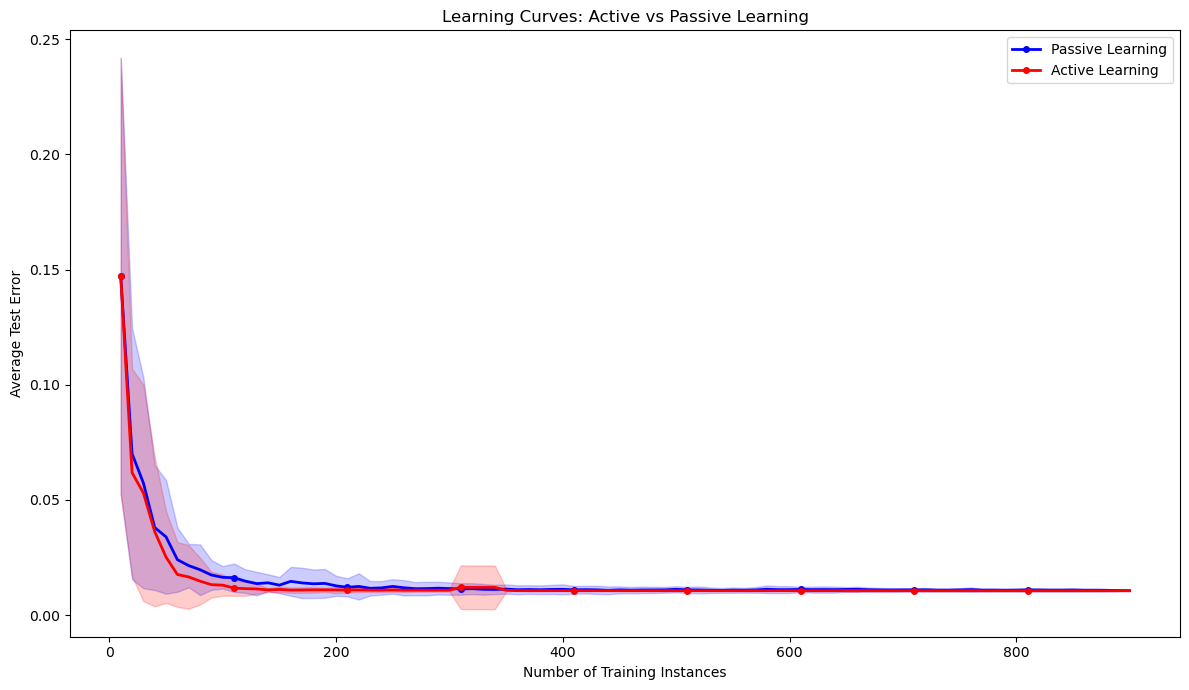

In [41]:
#(c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i
#and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot
#average test error versus number of training instances for both active and passive
#learners on the same figure and report your conclusions. Here, you are actually
#obtaining a learning curve by Monte-Carlo simulation.

mean_errors_passive = test_errors.mean(axis=0)
std_errors_passive = test_errors.std(axis=0)

mean_errors_active = test_errors_active.mean(axis=0)
std_errors_active = test_errors_active.std(axis=0)

#summary dataframe
pool_sizes = list(range(10,901,10))

results_df = pd.DataFrame({'Pool_Size': pool_sizes, 'Passive_mean': mean_errors_passive, 'Passive_std': std_errors_passive, 'Active_mean': mean_errors_active, 'Active_std': std_errors_active})

print('Learning Curve Results for Monte Carlo Simulation M=50')
print(results_df)

#create learning curve plot
plt.figure(figsize=(12,7))

#passive learning plot
plt.plot(pool_sizes, mean_errors_passive, 'b-', linewidth=2, label='Passive Learning', marker='o', markersize=4, markevery=10)
plt.fill_between(pool_sizes, mean_errors_passive - std_errors_passive, mean_errors_passive + std_errors_passive, alpha=0.2, color='blue')

#active learning plot
plt.plot(pool_sizes, mean_errors_active, 'r-', linewidth=2, label='Active Learning', marker='o', markersize=4, markevery=10)
plt.fill_between(pool_sizes, mean_errors_active - std_errors_active, mean_errors_active + std_errors_active, alpha=0.2, color='red')

plt.xlabel('Number of Training Instances')
plt.ylabel('Average Test Error')
plt.title('Learning Curves: Active vs Passive Learning')
plt.legend()
plt.tight_layout()
plt.show()
